<a href="https://colab.research.google.com/github/vvek17/Customer-segmentation-/blob/main/ML_Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preprocessing

In [ ]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

# Show all columns when printing DataFrame
pd.set_option('display.max_columns', None)

In [ ]:
# connect google drive to colab notebook
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the Dataset Unicode tells how to read special characters
df = pd.read_csv("/content/drive/MyDrive/Online retail dataset/Online_Retail.csv", encoding='unicode_escape')
# Display first 5 rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    50000 non-null  object 
 1   StockCode    50000 non-null  object 
 2   Description  49858 non-null  object 
 3   Quantity     50000 non-null  int64  
 4   InvoiceDate  50000 non-null  object 
 5   UnitPrice    50000 non-null  float64
 6   CustomerID   32119 non-null  float64
 7   Country      50000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ MB


In [ ]:
# Check rows where CustomerID is missing
df[df['CustomerID'].isnull()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01-12-2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01-12-2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01-12-2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01-12-2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
48827,540474,22383,LUNCH BAG SUKI DESIGN,2,07-01-2011 14:38,1.65,NaN,United Kingdom
48837,540476,46000P,POLYESTER FILLER PAD 65CMx65CM,1,07-01-2011 14:44,4.25,NaN,United Kingdom
49011,540495,35004B,SET OF 3 BLACK FLYING DUCKS,2,07-01-2011 17:04,5.45,NaN,United Kingdom
49032,540497,84415B,BLUE FLOCK CUSHION COVER,2,07-01-2011 17:18,3.75,NaN,United Kingdom


In [ ]:
# Check rows where Description is missing
df[df['Description'].isnull()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
44863,540241,35957,NaN,-939,05-01-2011 15:17,0.0,NaN,United Kingdom
45150,540252,22198,NaN,-100,05-01-2011 16:25,0.0,NaN,United Kingdom
45394,540256,35957,NaN,35,05-01-2011 17:21,0.0,NaN,United Kingdom
45623,540272,90096,NaN,-54,06-01-2011 11:57,0.0,NaN,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    50000 non-null  object 
 1   StockCode    50000 non-null  object 
 2   Description  49858 non-null  object 
 3   Quantity     50000 non-null  int64  
 4   InvoiceDate  50000 non-null  object 
 5   UnitPrice    50000 non-null  float64
 6   CustomerID   32119 non-null  float64
 7   Country      50000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.1+ MB


In [ ]:
df.shape

(50000, 8)

In [ ]:
# removing invoice that start with C. C means Cancle invoices
"""clean_rows = []
for index, row in df.iterrows():
    invoice = str(row['InvoiceNo']) #convert to string

    #keep only invoice which do n:ot start with C
    if not invoice.startswith("C"):
       clean_rows.append(row) """
#I used for loop to remove invoices which are cancle but I wanted to am use Pandas library

df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
sum(df['InvoiceNo'].astype(str).str.startswith("C"))



0

In [ ]:
df.shape

(49077, 8)

In [ ]:
# remove negative Quantity

df = df[df['Quantity'] > 0]
sum(df['Quantity'] < 0)

0

In [ ]:
# Remove Zero UnitPrice

df = df[df['UnitPrice'] > 0]
sum(df['UnitPrice'] < 0)

0

In [ ]:
# convert invoices no to date and time
# To calculate Recency later

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed', dayfirst=True)
df['InvoiceDate'].head()

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00


In [ ]:
df['InvoiceNo'].unique()[:10]


array(['536365', '536366', '536367', '536368', '536369', '536370',
       '536371', '536372', '536373', '536374'], dtype=object)

In [ ]:

df['StockCode'].unique()[:10]

array(['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730',
       '22633', '22632', '84879'], dtype=object)

In [ ]:
df['Description'].value_counts().head(10)


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,280
REGENCY CAKESTAND 3 TIER,208
HAND WARMER BABUSHKA DESIGN,187
PAPER CHAIN KIT 50'S CHRISTMAS,178
SCOTTIE DOG HOT WATER BOTTLE,177
HEART OF WICKER SMALL,172
CHOCOLATE HOT WATER BOTTLE,168
JAM MAKING SET PRINTED,159
JUMBO BAG RED RETROSPOT,147


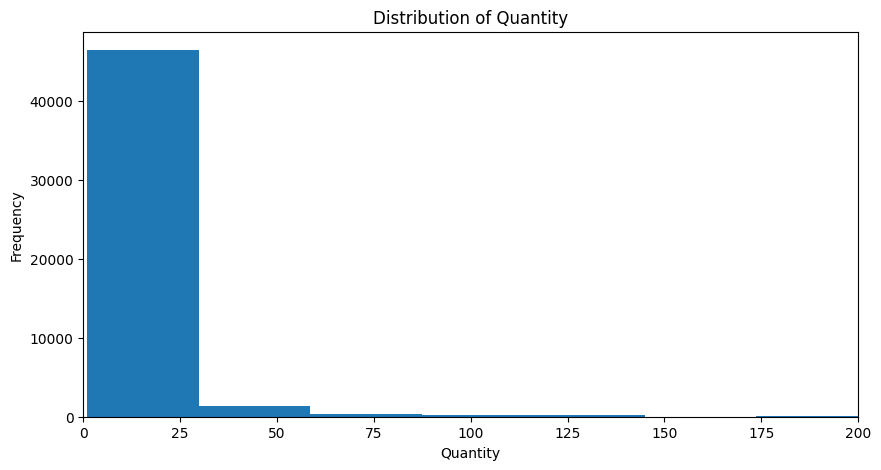

In [ ]:
#quantity distribution

plt.figure(figsize=(10,5))
plt.hist(df['Quantity'], bins=100)
plt.title("Distribution of Quantity")
plt.xlim(0,200)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()



EDA = Exploratory Data Analysis
In this Project it is useful to create insights Top selling products, Which countries buy most, Monthly sales patterns, Highest spending customers

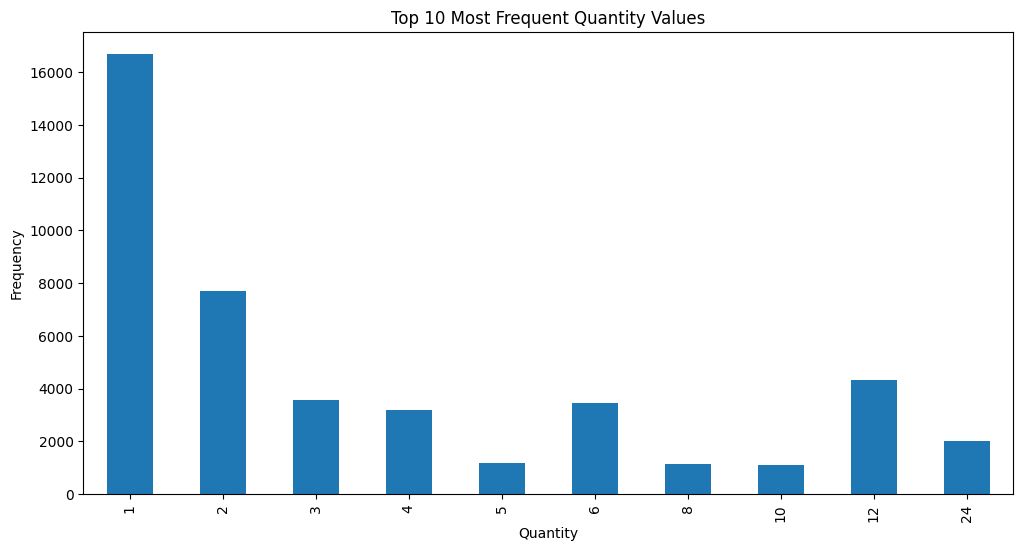

In [ ]:
df['Quantity'].value_counts().head(10).sort_index().plot(
    kind='bar',
    figsize=(12,6)
)

plt.title("Top 10 Most Frequent Quantity Values")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()





In [ ]:
df['Quantity'].value_counts().head(10)


,count
Quantity,
1,16683
2,7713
12,4332
3,3550
6,3442
4,3179
24,2000
5,1182
8,1147


In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.to_csv("/content/drive/MyDrive/Online retail dataset/Online_Retail_cleaned.csv",
          index=False)
test = pd.read_csv("/content/drive/MyDrive/Online retail dataset/Online_Retail_cleaned.csv")
test.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#top 10 total price
df.nlargest(10, 'TotalPrice')[['InvoiceNo', 'CustomerID', 'Quantity', 'UnitPrice', 'TotalPrice']]


,InvoiceNo,CustomerID,Quantity,UnitPrice,TotalPrice
15017,537632,NaN,1,13541.33,13541.33
16438,537659,18102.0,600,6.38,3828.00
19871,537899,12755.0,1488,2.55,3794.40
23263,538191,15061.0,272,10.95,2978.40
16440,537659,18102.0,600,4.78,2868.00
16429,537657,18102.0,408,6.38,2603.04
16441,537659,18102.0,72,32.69,2353.68
16435,537659,18102.0,1008,2.31,2328.48
16436,537659,18102.0,1008,2.31,2328.48
32671,539101,16029.0,2400,0.94,2256.00


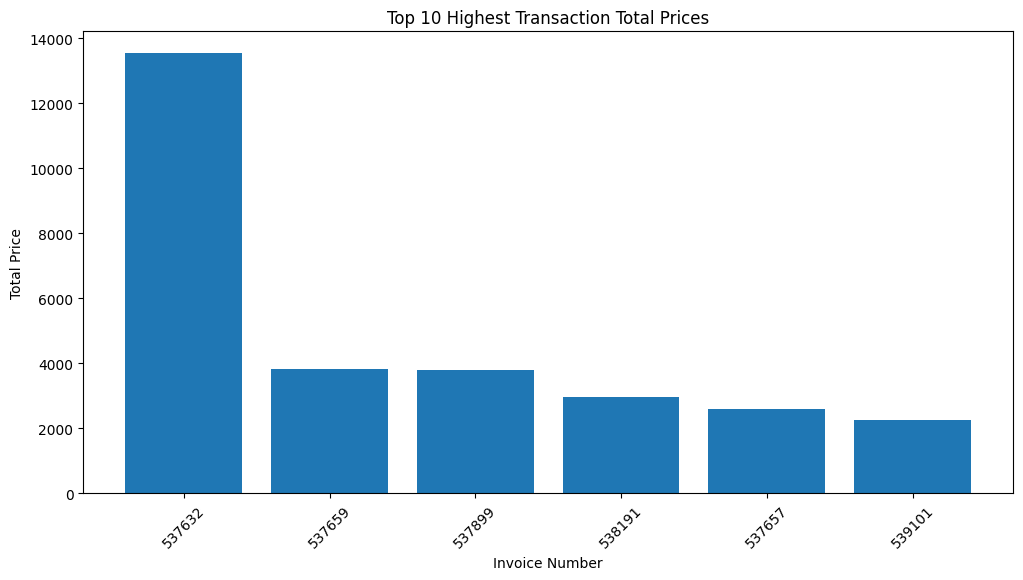

In [ ]:
top10 = df.nlargest(10, 'TotalPrice')

plt.figure(figsize=(12,6))
plt.bar(top10['InvoiceNo'].astype(str), top10['TotalPrice'])
plt.title("Top 10 Highest Transaction Total Prices")
plt.xlabel("Invoice Number")
plt.ylabel("Total Price")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['CustomerID'].nunique()


973

In [ ]:
df['Country'].value_counts()


,count
Country,
United Kingdom,45954
Germany,740
France,600
EIRE,373
Spain,173
Norway,147
Portugal,133
Belgium,95
Cyprus,83


In [ ]:
# Top 10 countries by number of orders - Which countries place the most orders?"

df['Country'].value_counts().head(10)


,count
Country,
United Kingdom,45954
Germany,740
France,600
EIRE,373
Spain,173
Norway,147
Portugal,133
Belgium,95
Cyprus,83


In [ ]:
#top 10 countries by Revenue - Which countries bring the most revenue?"

df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)


,TotalPrice
Country,
United Kingdom,863270.01
Germany,19217.27
France,12985.60
EIRE,10033.26
Netherlands,8784.48
Australia,8187.23
Japan,7705.07
Sweden,4381.86
Norway,3787.12


In [ ]:
# top 10 most sold product

df['Description'].value_counts().head(10)


,count
Description,
WHITE HANGING HEART T-LIGHT HOLDER,280
REGENCY CAKESTAND 3 TIER,208
HAND WARMER BABUSHKA DESIGN,187
PAPER CHAIN KIT 50'S CHRISTMAS,178
SCOTTIE DOG HOT WATER BOTTLE,177
HEART OF WICKER SMALL,172
CHOCOLATE HOT WATER BOTTLE,168
JAM MAKING SET PRINTED,159
JUMBO BAG RED RETROSPOT,147


In [ ]:
#Top 10 Customers by Total Spending

top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_customers


,TotalPrice
CustomerID,
18102.0,27834.61
15061.0,19950.66
16029.0,13202.52
17511.0,10573.22
14646.0,8591.88
13089.0,7738.67
14911.0,7737.94
12415.0,7011.38
16210.0,7000.64


In [ ]:


# 1. Create Year-Month column
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# 2. How many months + min/max
n_months = df['YearMonth'].nunique()
min_month = df['YearMonth'].min()
max_month = df['YearMonth'].max()

print("Number of months in dataset:", n_months)
print("From:", min_month, "to:", max_month)

# 3. Monthly sales (sum of TotalPrice)
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().sort_values(ascending=False)
print(monthly_sales.head())



Number of months in dataset: 2
From: 2010-12 to: 2011-01
YearMonth
2010-12    823746.14
2011-01    131600.74
Freq: M, Name: TotalPrice, dtype: float64


We need features because Each feature gives the model a new dimension to compare customer

RFM is simply way to descrive how "good" customer us.

R = Recency : Number of days since customer's last purchase(How they bought)

F = Frequncy : Number of order(invoices) the customer made in the period(How often they bought)

M= Monetary : Total money spent by the customer in the period(How valueble are they?)






In [ ]:
df['InvoiceDate'].min(), df['InvoiceDate'].max()


(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-01-09 15:13:00'))

now we will take one date as a refrence point, as for how many days ago did the customer last buy something? for the refrence point. which act as today!

In [ ]:
#To caaculate Recency, we need to know last purchase date and current datasaet so it will take as
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(snapshot_date)

2011-01-10 15:13:00


In [ ]:
# create RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, #Recency
    'InvoiceNo': 'count',                                    #Frequncy
    'TotalPrice': 'sum'                                      #Monetary
})

rfm.rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace = True) #inplace=True → update the existing table
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,34,31,711.79
12348.0,24,17,892.80
12370.0,24,91,1868.02
12377.0,21,43,1001.52
12383.0,19,37,600.72


TotalQuantityPurchased:

Total number of units/items bought by customer.

Shows buying intensity

Two customers with same Monetary may have very different quantities

Helps separate bulk buyers from premium buyers

In [ ]:
# 4. Total Quantity Purchased
qty = df.groupby('CustomerID')['Quantity'].sum().rename('TotalQuantityPurchased')
qty.head()

,TotalQuantityPurchased
CustomerID,
12347.0,319
12348.0,1254
12370.0,968
12377.0,604
12383.0,754


Unique Products Bought

Count of unique product items the customer purchased.
Shows product variety

Helps find customers who explore vs customers who stick to 1-2 items

In [ ]:
# Unique products bought
unique_prod = df.groupby('CustomerID')['StockCode'].nunique().rename('UniqueProductsBought')
unique_prod.head()

,UniqueProductsBought
CustomerID,
12347.0,31
12348.0,13
12370.0,90
12377.0,43
12383.0,37


Avg Unit Price

Average price of all products purchased by customer.

Identifies premium buyers vs budget buyers

Not redundant with Monetary (because Monetary = Quantity × Price)


In [ ]:
# Avg price per item
avg_price = df.groupby('CustomerID')['UnitPrice'].mean().rename('AvgUnitPrice')
avg_price.head()

,AvgUnitPrice
CustomerID,
12347.0,2.890000
12348.0,2.917647
12370.0,2.894286
12377.0,2.106279
12383.0,1.325135


In [ ]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=2, random_state=42)
customer_final['Cluster_2'] = kmeans_2.fit_predict(scaled_final)

customer_final['Cluster_2'].value_counts()


,count
Cluster_2,
1,795
0,158


Active Days

Number of days between first and last purchase.

Reflects customer lifecycle
Helps separate new customers vs long-term customers

In [ ]:
# ActiveDays = number of days between first and last purchase for each customer

customer_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])

customer_dates['ActiveDays'] = (customer_dates['max'] - customer_dates['min']).dt.days

# Show the first few results
customer_dates[['ActiveDays']].head()


,ActiveDays
CustomerID,
12347.0,0
12348.0,0
12370.0,2
12377.0,0
12383.0,0


In [ ]:
# most active Customer

most_active = customer_dates['ActiveDays'].idxmax()
max_days = customer_dates['ActiveDays'].max()

most_active, max_days

# Sort all customers by ActiveDays descending
active_rank = customer_dates.sort_values(by='ActiveDays', ascending=False)

active_rank.head(10)   # Top 10 active customers




,min,max,ActiveDays
CustomerID,,,
17841.0,2010-12-01 14:41:00,2011-01-09 14:36:00,38
14606.0,2010-12-01 16:57:00,2011-01-09 13:41:00,38
13758.0,2010-12-01 12:08:00,2011-01-09 11:41:00,38
16955.0,2010-12-01 13:31:00,2011-01-07 15:42:00,37
17757.0,2010-12-02 17:17:00,2011-01-09 14:21:00,37
15311.0,2010-12-01 09:41:00,2011-01-07 14:43:00,37
12971.0,2010-12-02 16:42:00,2011-01-09 14:17:00,37
12583.0,2010-12-01 08:45:00,2011-01-07 12:07:00,37
15485.0,2010-12-01 13:23:00,2011-01-07 17:18:00,37


CancellationCount
Number of invoices that were returned/cancelled.

Shows customer reliability
Helpful to find problematic or high-risk customers

In [ ]:
#calculate BEFORE removing 'C'
cancel_count = df[df['InvoiceNo'].astype(str).str.startswith('C')].groupby('CustomerID')['InvoiceNo'].count().rename('CancellationCount')
cancel_count = cancel_count.reindex(rfm.index, fill_value=0)

CancellationRate

Cancellations divided by total orders.

Some customers cancel 40-60% of orders
This affects profitability heavily
Useful independent feature (not same as CancellationCount)

In [ ]:
# I want to CancellationCount and CancellationRate to work before calculate them before deleting cancellations.

#creating copy of sheet beofre removing cancellation
df_original = pd.read_csv("/content/drive/MyDrive/Online retail dataset/Online_Retail.csv",
                          encoding='unicode_escape')
df_original['InvoiceDate'] = pd.to_datetime(df_original['InvoiceDate'], format='mixed', dayfirst=True)

#Build cancellation count from the original dataframe

cancel_count = df_original[df_original['InvoiceNo'].astype(str).str.startswith('C')] \
                .groupby('CustomerID')['InvoiceNo'] \
                .count() \
                .rename('CancellationCount')

cancel_count = cancel_count.reindex(rfm.index, fill_value=0)

#Calculate CancellationRate

cancel_rate = (cancel_count / rfm['Frequency']).rename('CancellationRate')


In [ ]:
# Cancellation rate
cancel_rate = (cancel_count / rfm['Frequency']).rename('CancellationRate')
cancel_rate = cancel_rate.reindex(rfm.index, fill_value=0)
cancel_rate.head()

,CancellationRate
CustomerID,
12347.0,0.0
12348.0,0.0
12370.0,0.0
12377.0,0.0
12383.0,0.0


CountryCount

Number of unique countries the customer ordered from.

Distinguishes local vs international buyers
E-commerce companies track this for logistics segmentation

CountryCount = The number of DIFFERENT countries from which the customer placed orders.

This is a behavior feature, not a nationality feature.

 It does NOT mean “customer is from UK” or “customer lives in France”
 It means “this customer placed orders in X different countries”

 Companies track this because it tells them:

 1. Local vs Global Buyers

1 -> Local customer

2 ->International or traveling customer

 2. Shipping behavior

Some customers order while travelling.

 3. Business vs personal customers

Some businesses order from multiple regions.

 4. Fraud detection

Multiple countries in short time may indicate fraud patterns.

In [ ]:
 #Number of unique countries
country_count = df.groupby('CustomerID')['Country'].nunique().rename('CountryCount')
country_count.head()

,CountryCount
CustomerID,
12347.0,1
12348.0,1
12370.0,2
12377.0,1
12383.0,1


In [ ]:
# Save customer-level feature dataset (recommended)

# combine all features
customer_features = pd.concat([
    rfm,
    qty,
    unique_prod,
    avg_price,
    customer_dates['ActiveDays'],
    cancel_count,
    cancel_rate,
    country_count
], axis=1)

# Handle missing values by filling with 0
customer_features = customer_features.fillna(0)

customer_features.to_csv("/content/drive/MyDrive/Online retail dataset/Customer_Level_Features.csv")

In [ ]:
# combine all features

customer_features = pd.concat([
    rfm,
    qty,
    unique_prod,
    avg_price,
    customer_dates['ActiveDays'],
    cancel_count,
    cancel_rate,
    country_count
], axis=1)

customer_features.head()



,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CancellationCount,CancellationRate,CountryCount
CustomerID,,,,,,,,,,
12347.0,34,31,711.79,319,31,2.890000,0,0,0.0,1
12348.0,24,17,892.80,1254,13,2.917647,0,0,0.0,1
12370.0,24,91,1868.02,968,90,2.894286,2,0,0.0,2
12377.0,21,43,1001.52,604,43,2.106279,0,0,0.0,1
12383.0,19,37,600.72,754,37,1.325135,0,0,0.0,1


We need to handle missing values (fillNA) because KMeans and most ML algorithms cannot work if your data has NaN values.

Example: UniqueProductsBought
If a customer NEVER bought anything (rare), the groupby might produce NaN.
Replacing with 0 = customer bought 0 unique products makes sense.

Example: CancellationCount
If a customer has no cancellations → NaN becomes 0 cancellations.

Example: CountryCount
If a customer has no country data → NaN becomes 0 countries.

Example: ActiveDays
If purchase dates missing → NaN → replace with 0 days active.

Example: AvgUnitPrice
If they never bought anything → NaN → 0 average price.

0 is a meaningful neutral value for these features

In [ ]:
customer_features = customer_features.fillna(0)
customer_features.head()

,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CancellationCount,CancellationRate,CountryCount
CustomerID,,,,,,,,,,
12347.0,34,31,711.79,319,31,2.890000,0,0,0.0,1
12348.0,24,17,892.80,1254,13,2.917647,0,0,0.0,1
12370.0,24,91,1868.02,968,90,2.894286,2,0,0.0,2
12377.0,21,43,1001.52,604,43,2.106279,0,0,0.0,1
12383.0,19,37,600.72,754,37,1.325135,0,0,0.0,1


K-Means is a distance-based algorithm.
If features have different scales (e.g., Monetary vs Frequency), the model becomes biased.
Scaling ensures each feature contributes equally to the clustering.

0 → means "exactly average"

Positive number → higher than average

Negative number → lower than average

Every feature has equal power in clustering

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

scaled_df = pd.DataFrame(scaled_features, index=customer_features.index, columns=customer_features.columns)
scaled_df.head()

,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CancellationCount,CancellationRate,CountryCount
CustomerID,,,,,,,,,,
12347.0,0.775904,-0.025911,0.004782,-0.091301,0.081123,-0.088385,-0.492353,-0.259812,-0.099323,-0.032075
12348.0,-0.053808,-0.355474,0.124248,1.078302,-0.468295,-0.085542,-0.492353,-0.259812,-0.099323,-0.032075
12370.0,-0.053808,1.386500,0.767887,0.720541,1.881995,-0.087945,-0.293160,-0.259812,-0.099323,31.176915
12377.0,-0.302721,0.256571,0.196002,0.265209,0.447402,-0.168976,-0.492353,-0.259812,-0.099323,-0.032075
12383.0,-0.468664,0.115330,-0.068523,0.452846,0.264263,-0.249302,-0.492353,-0.259812,-0.099323,-0.032075


 Clustering

X-axis (k) → number of clusters you try (2 to 10)

Y-axis (Inertia) → how tight the clusters are
(lower = customers inside each cluster are more similar)

Inertia = total distance of customers from their cluster center
4 clusters capture the main structure of the data.

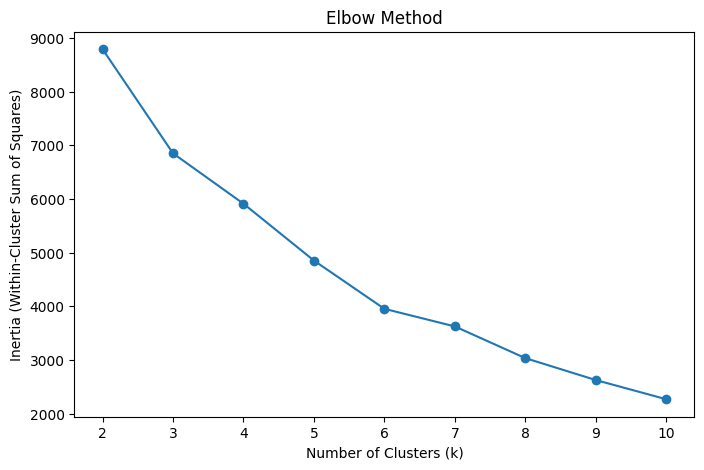

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()


In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_df)
customer_features.head()


,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CancellationCount,CancellationRate,CountryCount,Cluster
CustomerID,,,,,,,,,,,
12347.0,34,31,711.79,319,31,2.890000,0,0,0.0,1,0
12348.0,24,17,892.80,1254,13,2.917647,0,0,0.0,1,0
12370.0,24,91,1868.02,968,90,2.894286,2,0,0.0,2,2
12377.0,21,43,1001.52,604,43,2.106279,0,0,0.0,1,0
12383.0,19,37,600.72,754,37,1.325135,0,0,0.0,1,0


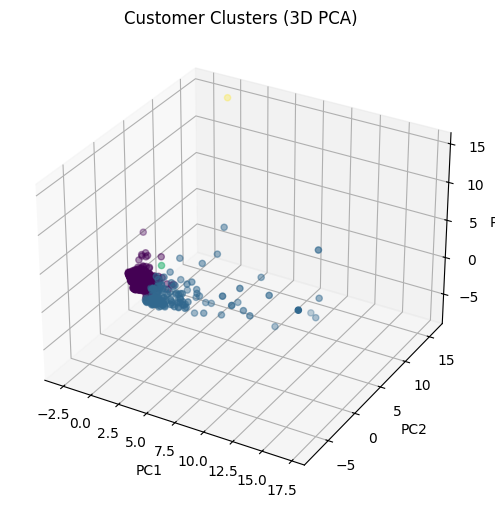

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_df)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_components[:,0],
           pca_components[:,1],
           pca_components[:,2],
           c=customer_features['Cluster'],
           s=20)

ax.set_title("Customer Clusters (3D PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()


In [ ]:
from sklearn.cluster import KMeans

k = 2
kmeans_2 = KMeans(n_clusters=k, random_state=42)
customer_features['Cluster_2'] = kmeans_2.fit_predict(scaled_df)

customer_features['Cluster_2'].value_counts()


,count
Cluster_2,
0,972
1,1


In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_df)


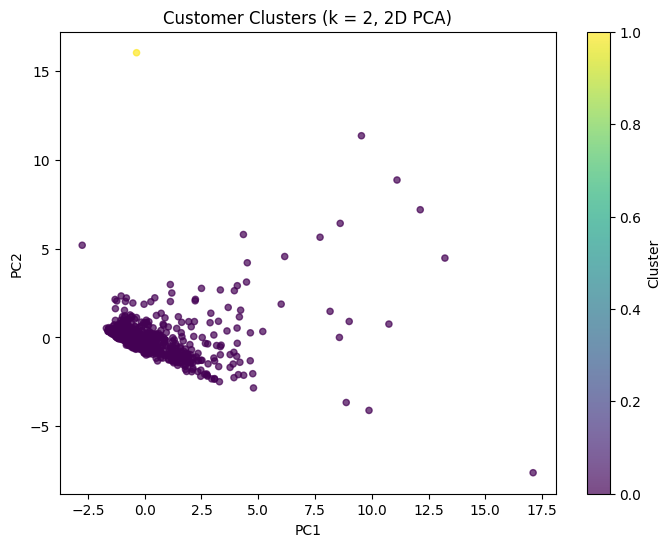

In [ ]:
pca_2d = PCA(n_components=2)
pca_components_2d = pca_2d.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
plt.scatter(
    pca_components_2d[:,0],
    pca_components_2d[:,1],
    c=customer_features['Cluster_2'],
    cmap='viridis',
    s=20,
    alpha=0.7
)

plt.title("Customer Clusters (k = 2, 2D PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
outlier_customer = customer_features[customer_features['Cluster_2'] == 1]
outlier_customer


,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CancellationCount,CancellationRate,CountryCount,Cluster,Cluster_2
CustomerID,,,,,,,,,,,,
15823.0,39,1,15.0,1,1,15.0,0,16,16.0,1,3,1


In [ ]:
customer_k2_clean = customer_features.drop(index=outlier_customer.index).copy()


In [ ]:
for col in ['Monetary', 'Frequency', 'TotalQuantityPurchased', 'ActiveDays']:
    upper = customer_features[col].quantile(0.99)
    customer_features[col] = customer_features[col].clip(upper=upper)



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = customer_k2_clean.drop(columns=['Cluster', 'Cluster_2'], errors='ignore')

scaler = StandardScaler()
scaled_clean = scaler.fit_transform(features)

kmeans_2 = KMeans(n_clusters=2, random_state=42)
customer_k2_clean['Cluster_2'] = kmeans_2.fit_predict(scaled_clean)

customer_k2_clean['Cluster_2'].value_counts()


,count
Cluster_2,
0,946
1,26


In [ ]:
features = customer_features.drop(
    columns=[
        'CancellationCount',
        'CancellationRate',
        'Cluster',
        'Cluster_2',
        'Cluster_raw'
    ],
    errors='ignore'
)


In [ ]:
features = customer_features.copy()
features.head()


,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CancellationCount,CancellationRate,CountryCount,Cluster,Cluster_2
CustomerID,,,,,,,,,,,,
12347.0,34,31.0,711.79,319.0,31,2.890000,0,0,0.0,1,0,0
12348.0,24,17.0,892.80,1254.0,13,2.917647,0,0,0.0,1,0,0
12370.0,24,91.0,1868.02,968.0,90,2.894286,2,0,0.0,2,2,0
12377.0,21,43.0,1001.52,604.0,43,2.106279,0,0,0.0,1,0,0
12383.0,19,37.0,600.72,754.0,37,1.325135,0,0,0.0,1,0,0


In [ ]:
features = customer_features.drop(
    columns=[
        'CancellationCount',
        'CancellationRate',
        'Cluster',
        'Cluster_raw',
        'Cluster_2'
    ],
    errors='ignore'
)


In [ ]:
features.columns


Index(['Recency', 'Frequency', 'Monetary', 'TotalQuantityPurchased',
       'UniqueProductsBought', 'AvgUnitPrice', 'ActiveDays', 'CountryCount'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=2, random_state=42)
labels = kmeans_2.fit_predict(scaled_df)

customer_features['Cluster_2'] = labels


In [ ]:
customer_features['Cluster_2'].value_counts()


,count
Cluster_2,
0,801
1,172


In [ ]:
cluster_summary = customer_features.groupby('Cluster_2').mean()
cluster_summary


,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CancellationCount,CancellationRate,CountryCount,Cluster
Cluster_2,,,,,,,,,,,
0,27.706617,22.013733,385.357803,210.958801,20.870162,3.892018,1.305868,0.475655,0.057638,1.000000,0.008739
1,10.406977,71.186047,1888.803174,1098.425581,63.139535,3.085922,21.813953,1.941860,0.029504,1.005814,0.895349


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=cluster_summary)

https://docs.google.com/spreadsheets/d/18jbyTLNRtwAYqZtMsVoOToNf3oRmWi29V-YCj_E2lWM/edit#gid=0


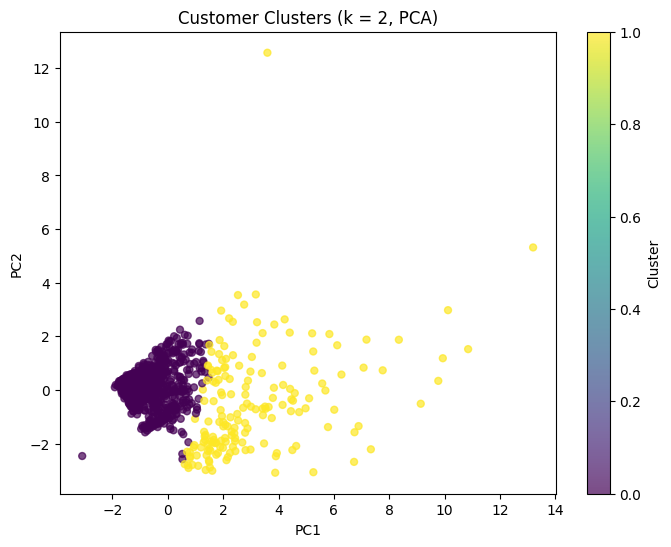

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
plt.scatter(
    pca_components[:,0],
    pca_components[:,1],
    c=customer_features['Cluster_2'],
    cmap='viridis',
    s=25,
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Customer Clusters (k = 2, PCA)")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3, random_state=42)
customer_features['Cluster_3'] = kmeans_3.fit_predict(scaled_df)

customer_features['Cluster_3'].value_counts()


,count
Cluster_3,
0,784
1,155
2,34


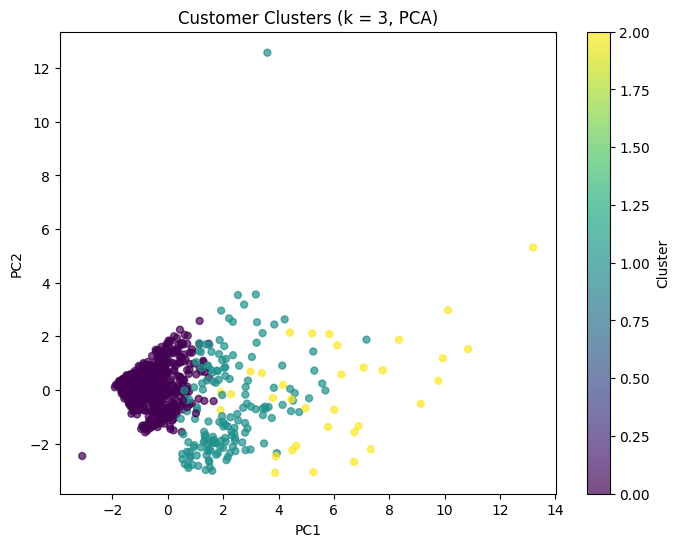

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
plt.scatter(
    pca_components[:,0],
    pca_components[:,1],
    c=customer_features['Cluster_3'],
    cmap='viridis',
    s=25,
    alpha=0.7
)

plt.title("Customer Clusters (k = 3, PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
import pandas as pd

pca_df = pd.DataFrame(
    pca_components,
    columns=['PC1', 'PC2'],
    index=customer_features.index
)

pca_df['Cluster'] = customer_features['Cluster_3']


In [ ]:
overlap_candidates = pca_df[pca_df['Cluster'].isin([1, 2])]


In [ ]:
pc1_boundary = overlap_candidates.groupby('Cluster')['PC1'].mean().mean()

overlapping_points = overlap_candidates[
    (overlap_candidates['PC1'] > pc1_boundary - 0.5) &
    (overlap_candidates['PC1'] < pc1_boundary + 0.5)
]


In [ ]:
overlapping_customers = customer_features.loc[overlapping_points.index]
overlapping_customers.head()


,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CancellationCount,CancellationRate,CountryCount,Cluster,Cluster_2,Cluster_3
CustomerID,,,,,,,,,,,,,
12682.0,5,89.0,1910.40,849.0,65,3.248315,33,0,0.000000,1,1,1,1
13069.0,1,114.0,985.06,997.0,109,1.611491,35,0,0.000000,1,1,1,1
13319.0,6,93.0,2061.97,910.0,66,3.270860,26,5,0.053763,1,1,1,1
13408.0,3,44.0,3335.40,2024.0,42,2.152955,36,2,0.045455,1,1,1,2
13458.0,4,83.0,2675.04,1450.0,75,2.302410,21,1,0.012048,1,1,1,1


In [ ]:
features = customer_features.drop(
    columns=[
        'CancellationCount',
        'CancellationRate',
        'Cluster',
        'Cluster_raw',
        'Cluster_2',
        'Cluster_3'
    ],
    errors='ignore'
)


In [ ]:
features.columns


Index(['Recency', 'Frequency', 'Monetary', 'TotalQuantityPurchased',
       'UniqueProductsBought', 'AvgUnitPrice', 'ActiveDays', 'CountryCount'],
      dtype='object')

In [ ]:
features_no_outliers = features.copy()

for col in features_no_outliers.columns:
    upper_limit = features_no_outliers[col].quantile(0.99)
    lower_limit = features_no_outliers[col].quantile(0.01)

    features_no_outliers = features_no_outliers[
        (features_no_outliers[col] >= lower_limit) &
        (features_no_outliers[col] <= upper_limit)
    ]

print("Before:", features.shape[0])
print("After:", features_no_outliers.shape[0])


Before: 973
After: 892


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_no_outliers)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

customer_clean = features_no_outliers.copy()
customer_clean['Cluster'] = clusters

customer_clean['Cluster'].value_counts()


,count
Cluster,
0,606
1,176
2,110


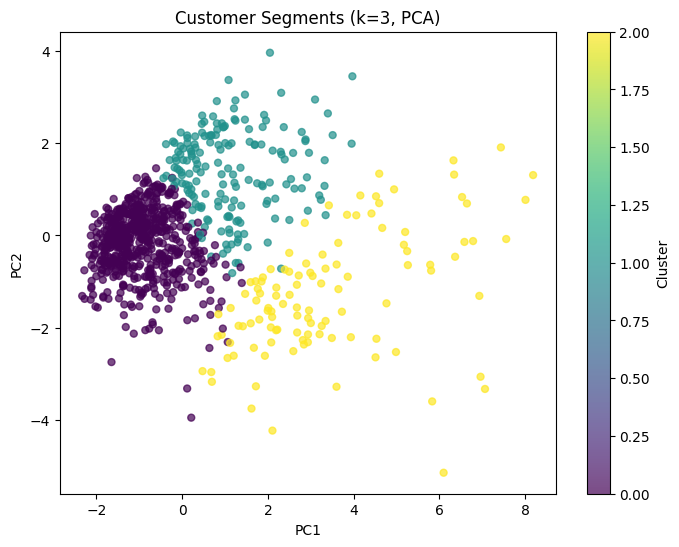

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(
    pca_components[:,0],
    pca_components[:,1],
    c=customer_clean['Cluster'],
    cmap='viridis',
    s=25,
    alpha=0.7
)

plt.title("Customer Segments (k=3, PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
cluster_profile = customer_clean.groupby('Cluster').mean().round(2)
cluster_profile


,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CountryCount
Cluster,,,,,,,,
0,27.31,15.19,331.02,172.20,14.79,3.40,1.22,1.0
1,27.62,58.69,628.81,341.39,53.25,2.88,2.98,1.0
2,6.82,52.24,1450.15,761.43,42.35,3.23,26.26,1.0


In [ ]:
cluster_names = {
    0: "Low-Value / Infrequent Customers",
    1: "Mid-Value Regular Customers",
    2: "High-Value Loyal Customers"
}


In [ ]:
customer_clean['Segment'] = customer_clean['Cluster'].map(cluster_names)


In [ ]:
customer_clean[['Cluster', 'Segment']].head()


,Cluster,Segment
CustomerID,,
12347.0,0,Low-Value / Infrequent Customers
12348.0,0,Low-Value / Infrequent Customers
12377.0,1,Mid-Value Regular Customers
12383.0,1,Mid-Value Regular Customers
12386.0,2,High-Value Loyal Customers


In [ ]:
customer_clean.groupby('Segment').mean().round(2)


,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CountryCount,Cluster
Segment,,,,,,,,,
High-Value Loyal Customers,6.82,52.24,1450.15,761.43,42.35,3.23,26.26,1.0,2.0
Low-Value / Infrequent Customers,27.31,15.19,331.02,172.20,14.79,3.40,1.22,1.0,0.0
Mid-Value Regular Customers,27.62,58.69,628.81,341.39,53.25,2.88,2.98,1.0,1.0


IHierarchical clustering is useful because:

It does not require choosing K ahead of time (unlike K-Means)

It shows a visual tree (dendrogram) to understand relationships among customers

It works well when your dataset is not too large (RFM is perfect size)

It can reveal natural cluster distances, not just “hard assignment”

Basically:
K-Means gives clean clusters,
Hierarchical shows the structure of how customers are grouped.

In [ ]:
all_features = customer_features.select_dtypes(include=['int64', 'float64']).copy()

# Remove cluster labels if present
all_features = all_features.drop(
    columns=['Cluster', 'Cluster_2', 'Cluster_3'],
    errors='ignore'
)

all_features.columns


Index(['Recency', 'Frequency', 'Monetary', 'TotalQuantityPurchased',
       'UniqueProductsBought', 'AvgUnitPrice', 'ActiveDays',
       'CancellationCount', 'CancellationRate', 'CountryCount'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_scaled = scaler.fit_transform(all_features)


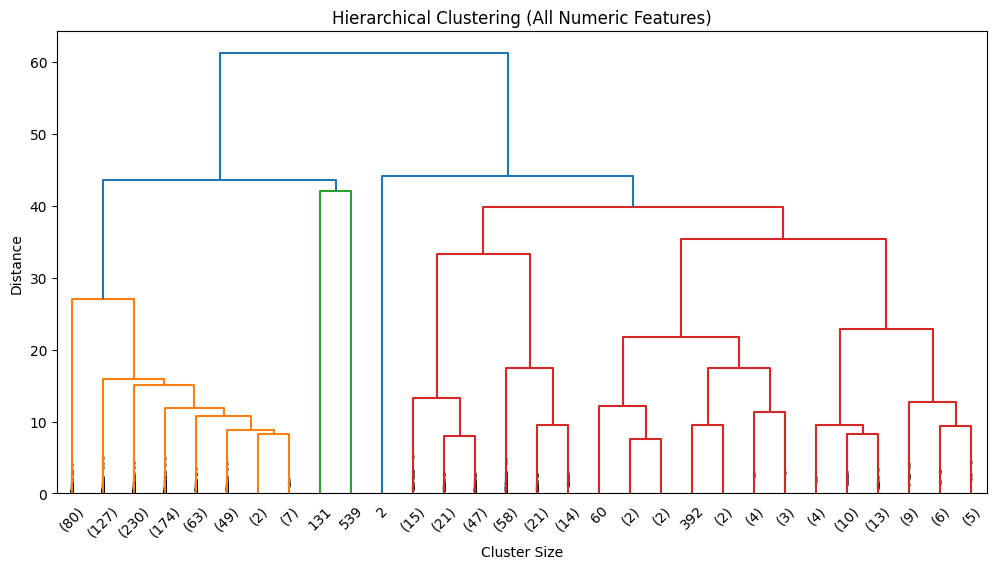

In [ ]:
#dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linked_all = linkage(all_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(
    linked_all,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=45,
    leaf_font_size=10,
    show_contracted=True
)

plt.title("Hierarchical Clustering (All Numeric Features)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()



In [ ]:
from scipy.cluster.hierarchy import fcluster

customer_features['Hier_All'] = fcluster(linked_all, t=3, criterion='maxclust')
customer_features['Hier_All'].value_counts()


,count
Hier_All,
1,734
2,238
3,1


In [ ]:
core_features = customer_features[
    ['Recency',
     'Frequency',
     'Monetary',
     'TotalQuantityPurchased',
     'UniqueProductsBought',
     'AvgUnitPrice',
     'ActiveDays',
     'CountryCount']
].copy()


In [ ]:
scaler = StandardScaler()
core_scaled = scaler.fit_transform(core_features)


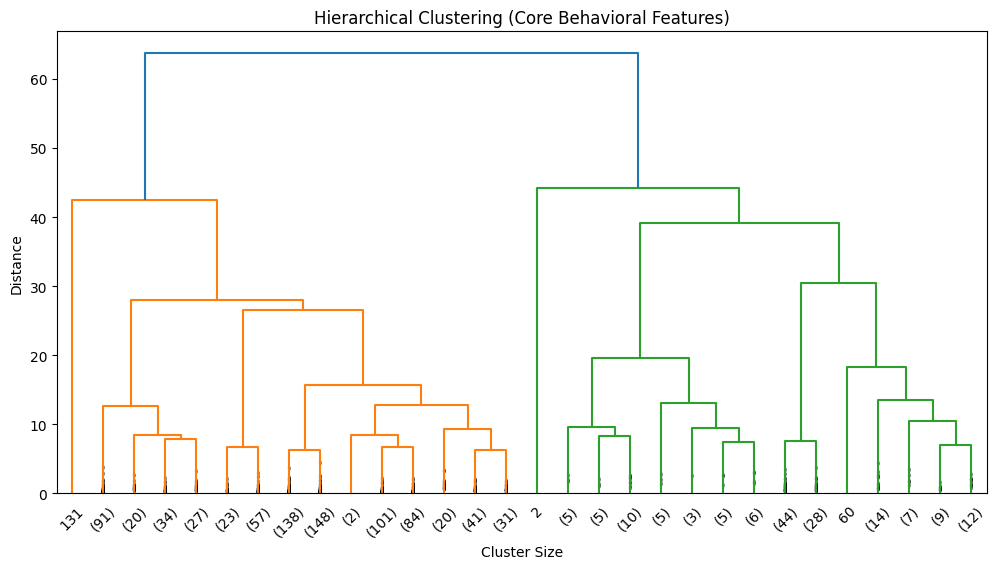

In [ ]:
linked_core = linkage(core_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(
    linked_core,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=45,
    leaf_font_size=10,
    show_contracted=True
)

plt.title("Hierarchical Clustering (Core Behavioral Features)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [ ]:
core_hier_clusters = fcluster(linked_core, t=3, criterion='maxclust')

customer_features['Hier_Core'] = core_hier_clusters
customer_features['Hier_Core'].value_counts()


,count
Hier_Core,
1,818
2,154
3,1


In [ ]:
customer_features.groupby('Hier_All').mean().round(2)
customer_features.groupby('Hier_Core').mean().round(2)


,Recency,Frequency,Monetary,TotalQuantityPurchased,UniqueProductsBought,AvgUnitPrice,ActiveDays,CancellationCount,CancellationRate,CountryCount,Cluster,Cluster_2,Cluster_3,Hier_All
Hier_Core,,,,,,,,,,,,,,
1,27.67,23.74,396.75,216.55,22.25,3.87,1.45,0.49,0.06,1.0,0.02,0.03,0.05,1.1
2,8.62,67.30,1994.41,1167.54,60.29,3.10,23.43,2.05,0.03,1.0,0.92,0.96,1.20,2.0
3,24.00,91.00,1868.02,968.00,90.00,2.89,2.00,0.00,0.00,2.0,2.00,1.00,1.00,3.0
